In [30]:
import cplex
from cplex.exceptions import CplexError
from docplex.mp.model import Model
import random
import matplotlib.pyplot as plt
import docplex.mp.model as Solution
import numpy as np

In [31]:
n = 10
city = [i for i in range(n)]
pair = [(i,j) for i in city for j in city if i != j]

In [32]:
print(pair)

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 0), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 0), (2, 1), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 0), (3, 1), (3, 2), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 0), (4, 1), (4, 2), (4, 3), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 6), (5, 7), (5, 8), (5, 9), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 7), (6, 8), (6, 9), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 8), (7, 9), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 9), (9, 0), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8)]


tạo tọa ma trận tọa độ vị trí

In [33]:
random = np.random
random.seed(1)

coord_x = random.rand(n) * 100
coord_y = random.rand(n) * 100

print(coord_x, coord_y)

[4.17022005e+01 7.20324493e+01 1.14374817e-02 3.02332573e+01
 1.46755891e+01 9.23385948e+00 1.86260211e+01 3.45560727e+01
 3.96767474e+01 5.38816734e+01] [41.91945144 68.52195004 20.44522497 87.81174364  2.73875932 67.04675102
 41.73048024 55.86898284 14.03869386 19.81014891]


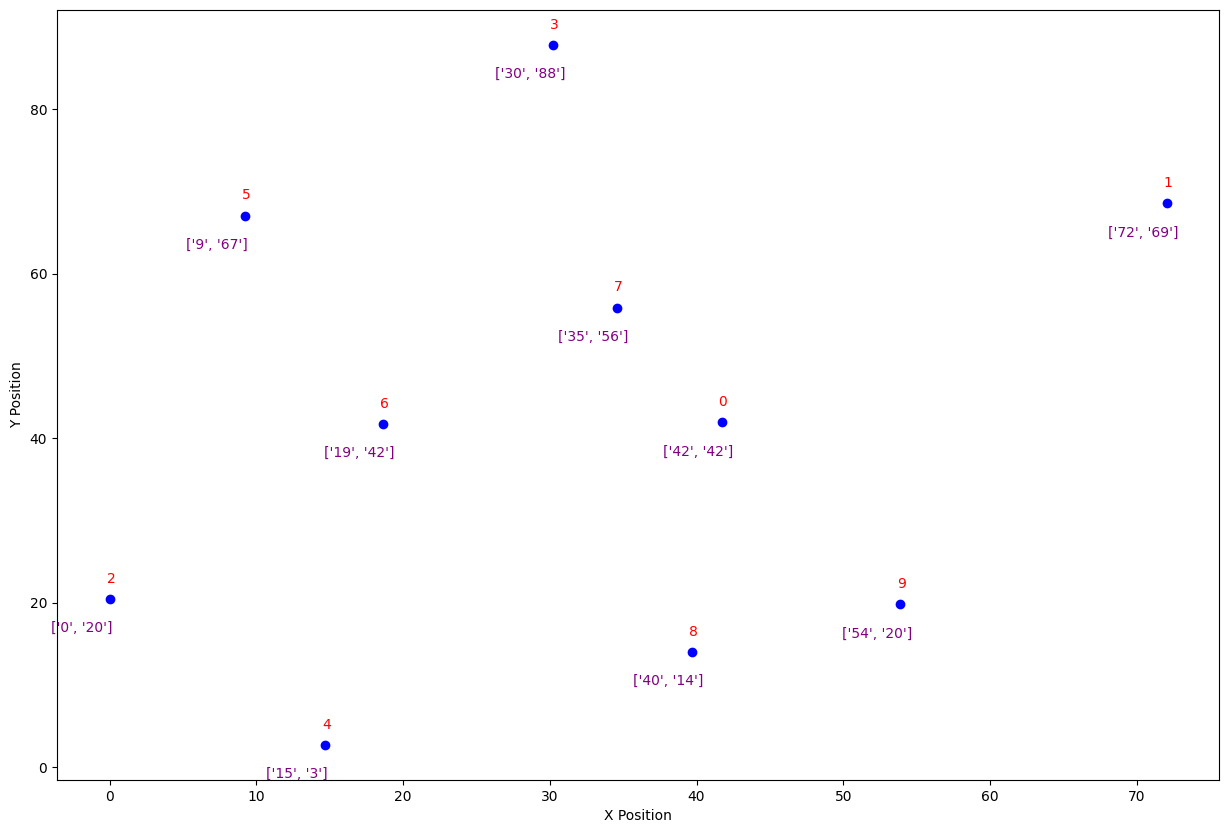

In [34]:
x = coord_x
y = coord_y

plt.figure(figsize = (15,10))
plt.scatter(x,y, color = "blue")
plt.xlabel('X Position')
plt.ylabel('Y Position')

s = []
for i in range(len(x)):
    s_temp = []
    s_temp.append("%.lf" % coord_x[i])
    s_temp.append("%.lf" % coord_y[i])
    s.append(s_temp)

for i in range(len(coord_x)):
    plt.annotate(str(s[i]), xy = (coord_x[i],coord_y[i]), xytext= (coord_x[i] - 4,coord_y[i] - 4), color = "purple")

for i in range(len(coord_x)):
    plt.annotate(str(i), xy = (coord_x[i],coord_y[i]), xytext= (coord_x[i] - 0.2,coord_y[i] + 2), color = "red")
plt.show()


In [38]:
distance = {(i,j):np.hypot(coord_x[i] - coord_x[j], coord_y[i] - coord_y[j]) for i,j in pair}
distance

{(0, 1): 40.343734686869105,
 (0, 2): 46.89629112124784,
 (0, 3): 47.303690570016926,
 (0, 4): 47.59794489462533,
 (0, 5): 41.05574686837662,
 (0, 6): 23.07695306363146,
 (0, 7): 15.673435119505731,
 (0, 8): 27.954232297204122,
 (0, 9): 25.242044673500747,
 (1, 0): 40.343734686869105,
 (1, 2): 86.5932886707615,
 (1, 3): 46.035514504946775,
 (1, 4): 87.27678729456653,
 (1, 5): 62.815914396591445,
 (1, 6): 59.7497232460005,
 (1, 7): 39.55472645458145,
 (1, 8): 63.366526264285355,
 (1, 9): 51.983557369704435,
 (2, 0): 46.89629112124784,
 (2, 1): 86.5932886707615,
 (2, 3): 73.83499324894147,
 (2, 4): 22.99035163020977,
 (2, 5): 47.50531861960636,
 (2, 6): 28.276577167726387,
 (2, 7): 49.47903035017639,
 (2, 8): 40.17935357434038,
 (2, 9): 53.873979243542614,
 (3, 0): 47.303690570016926,
 (3, 1): 46.035514504946775,
 (3, 2): 73.83499324894147,
 (3, 4): 86.48383490709115,
 (3, 5): 29.53234880513543,
 (3, 6): 47.52063517284759,
 (3, 7): 32.23393709297511,
 (3, 8): 74.37501179952103,
 (3, 9): 

In [39]:
mdl = Model('TSP')

In [40]:
x = mdl.binary_var_dict(pair, name = 'x')
d = mdl.continuous_var_dict(city, name = 'd')

định nghĩa hàm mục tiêu

In [41]:
mdl.minimize(mdl.sum(distance[i] * x[i] for i in pair ))

định nghĩa ràng buộc

In [42]:
#mỗi thành phố chỉ được ghe qua một lần 
for c in city:
    mdl.add_constraint(mdl.sum(x[(i,j)] for i,j in pair if i == c)== 1, ctname= "out_%d" %c)

In [47]:
for c in city:
    mdl.add_constraint(mdl.sum(x[(i,j)] for i,j in pair if j == c)== 1, ctname= "in_%d" %c)

In [48]:
for i,j in pair:
    if j != 0:
        mdl.add_indicator(x[(i,j)], d[i] + 1 == d[j], name = 'order_(%d,_%d)' %(i,j))

In [49]:
print(mdl.export_to_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: TSP

Minimize
 obj: 40.343734686869 x_0_1 + 46.896291121248 x_0_2 + 47.303690570017 x_0_3
      + 47.597944894625 x_0_4 + 41.055746868377 x_0_5 + 23.076953063631 x_0_6
      + 15.673435119506 x_0_7 + 27.954232297204 x_0_8 + 25.242044673501 x_0_9
      + 40.343734686869 x_1_0 + 86.593288670761 x_1_2 + 46.035514504947 x_1_3
      + 87.276787294567 x_1_4 + 62.815914396591 x_1_5 + 59.749723246000 x_1_6
      + 39.554726454581 x_1_7 + 63.366526264285 x_1_8 + 51.983557369704 x_1_9
      + 46.896291121248 x_2_0 + 86.593288670761 x_2_1 + 73.834993248941 x_2_3
      + 22.990351630210 x_2_4 + 47.505318619606 x_2_5 + 28.276577167726 x_2_6
      + 49.479030350176 x_2_7 + 40.179353574340 x_2_8 + 53.873979243543 x_2_9
      + 47.303690570017 x_3_0 + 46.035514504947 x_3_1 + 73.834993248941 x_3_2
      + 86.483834907091 x_3_4 + 29.532348805135 x_3_5 + 47.520635172848 x_3_6
      + 32.233937092975 x_3_7 + 74.375011799521 x_3

In [50]:
solution = mdl.solve(log_output = True) 

Version identifier: 22.1.1.0 | 2023-02-09 | 22d6266e5
CPXPARAM_Read_DataCheck                          1
Tried aggregator 2 times.
MIP Presolve eliminated 10 rows and 0 columns.
MIP Presolve modified 198 coefficients.
Aggregator did 198 substitutions.
Reduced MIP has 65 rows, 145 columns, and 315 nonzeros.
Reduced MIP has 90 binaries, 0 generals, 0 SOSs, and 243 indicators.
Presolve time = 0.08 sec. (0.57 ticks)
Probing time = 0.00 sec. (0.15 ticks)
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 65 rows, 145 columns, and 315 nonzeros.
Reduced MIP has 90 binaries, 0 generals, 0 SOSs, and 243 indicators.
Presolve time = 0.00 sec. (0.29 ticks)
Probing time = 0.00 sec. (0.14 ticks)
Clique table members: 56.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 12 threads.
Root relaxation solution time = 0.05 sec. (0.11 ticks)

        Nodes                                         Cuts/
   Node  Left 

In [51]:
mdl.get_solve_status()

<JobSolveStatus.OPTIMAL_SOLUTION: 2>

In [52]:
solution.display()

solution for: TSP
objective: 277.076
status: OPTIMAL_SOLUTION(2)
x_0_7 = 1
x_1_3 = 1
x_2_4 = 1
x_3_5 = 1
x_4_8 = 1
x_5_6 = 1
x_6_2 = 1
x_7_1 = 1
x_8_9 = 1
x_9_0 = 1
d_1 = 2.000
d_2 = 6.000
d_3 = 3.000
d_4 = 7.000
d_5 = 4.000
d_6 = 5.000
d_7 = 1.000
d_8 = 8.000
d_9 = 9.000


In [53]:
pair_solve = [i for i in pair if x[i].solution_value >0.9]
print(pair_solve)

[(0, 7), (1, 3), (2, 4), (3, 5), (4, 8), (5, 6), (6, 2), (7, 1), (8, 9), (9, 0)]
